In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# PART 1a

In [2]:
# Parameters
N = 10000
s = 1
X = np.zeros(N)
X[0] = 0

In [3]:
# Probability Density Function
def pdf(X):
    return 0.5 * np.exp(-np.abs(X))

In [4]:
# Metropolis-Hasting algorithm
def Metropolis_Hasting_Algorithm(N, s, X):

    for i in range(1, N):
        x_star = np.random.normal(X[i-1], s)
        r = pdf(x_star) / pdf(X[i-1])
        u = np.random.uniform(0, 1)

        if np.log(u) < np.log(r):
            X[i] = x_star
        else:
            X[i] = X[i-1]
    return X

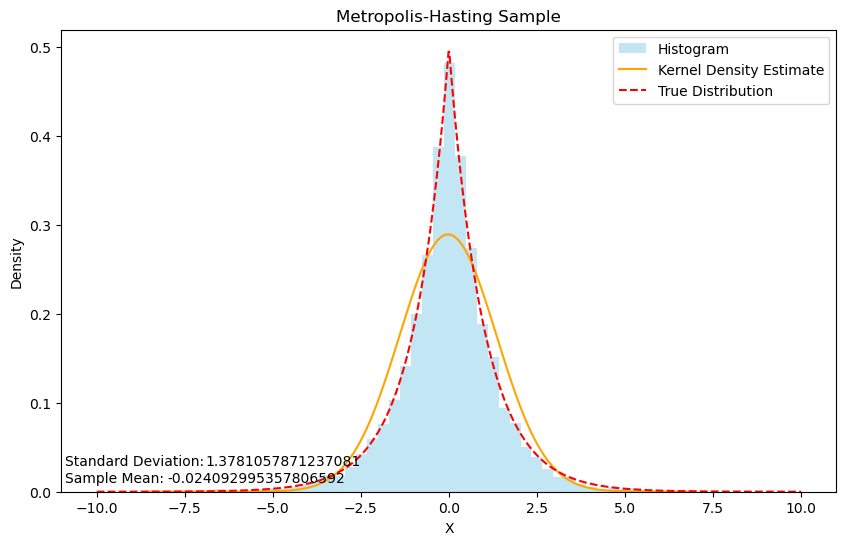

In [5]:
# Generate Metropolis Hasting Algorithm as X
X = Metropolis_Hasting_Algorithm(N, s, X)

# Plot Histogram
plt.figure(figsize=(10, 6))
plt.hist(X, bins=50, density=True, alpha=0.5, color='skyblue', label='Histogram')

# Kernel Density Estimation
kde = norm(np.mean(X), np.std(X)).pdf
x_vals = np.linspace(np.min(X), np.max(X), 1000)
plt.plot(x_vals, kde(x_vals), color='orange', label='Kernel Density Estimate')

# Plot True Distribution
x_true = np.linspace(-10, 10, 1000)
plt.plot(x_true, pdf(x_true), color='red', linestyle='--', label='True Distribution')
plt.title('Metropolis-Hasting Sample')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()

# Report Sample Mean and Standard Deviation
x_mean = np.mean(X)
x_std = np.std(X)
plt.text(-10.9, 0.01, 'Sample Mean:')
plt.text(-10.9, 0.03, 'Standard Deviation:')
plt.text(-8, 0.01, x_mean)
plt.text(-6.9, 0.03, x_std)
plt.show()

# PART 1b

In [6]:
# Parameters
N = 2000
s_vals = np.arange(0.001, 1, 0.01) 
J = 4

In [7]:
# Calculate R-hat with Metropolis Hasting Algorithm
def calculate_r_hat(N, J, s):
    Xs = np.zeros((N, J))

    for j in range(J):
        X = np.zeros(N)
        X[0] = 0
    
    for i in range(1, N):
        x_star = np.random.normal(X[i-1], s)
        r = pdf(x_star) / pdf(X[i-1])
        u = np.random.uniform(0, 1)

        if np.log(u) < np.log(r):
            X[i] = x_star
        else:
            X[i] = X[i-1]

    Xs[:, j] = X

    Mj = np.mean(Xs, axis = 0)
    Vj = np.var(Xs, axis = 0)
    W = np.mean(Vj)
    M = np.mean(Mj)
    B = np.sum((Mj - M) ** 2) / 3
    R_hat = np.sqrt((B + W) / W)

    return R_hat


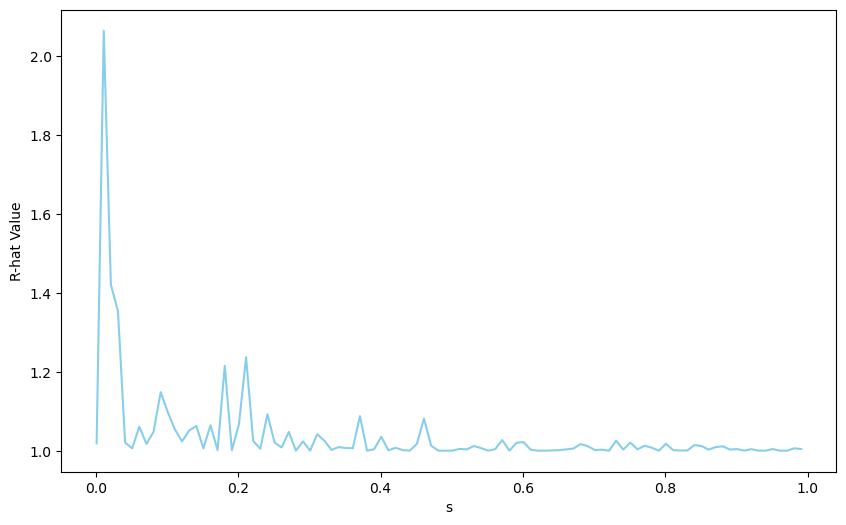

In [8]:
# Initialize R-hat values
R_hat_values = np.zeros_like(s_vals)

for i, s in enumerate(s_vals):
    R_hat_values[i] = calculate_r_hat(N, J, s)

plt.figure(figsize=(10, 6))
plt.plot(s_vals, R_hat_values, color='skyblue')
plt.xlabel('s')
plt.ylabel('R-hat Value')
plt.show()